# Waternet Example

- Code: https://github.com/tnwei/waternet
- Original paper: https://arxiv.org/abs/1901.05495

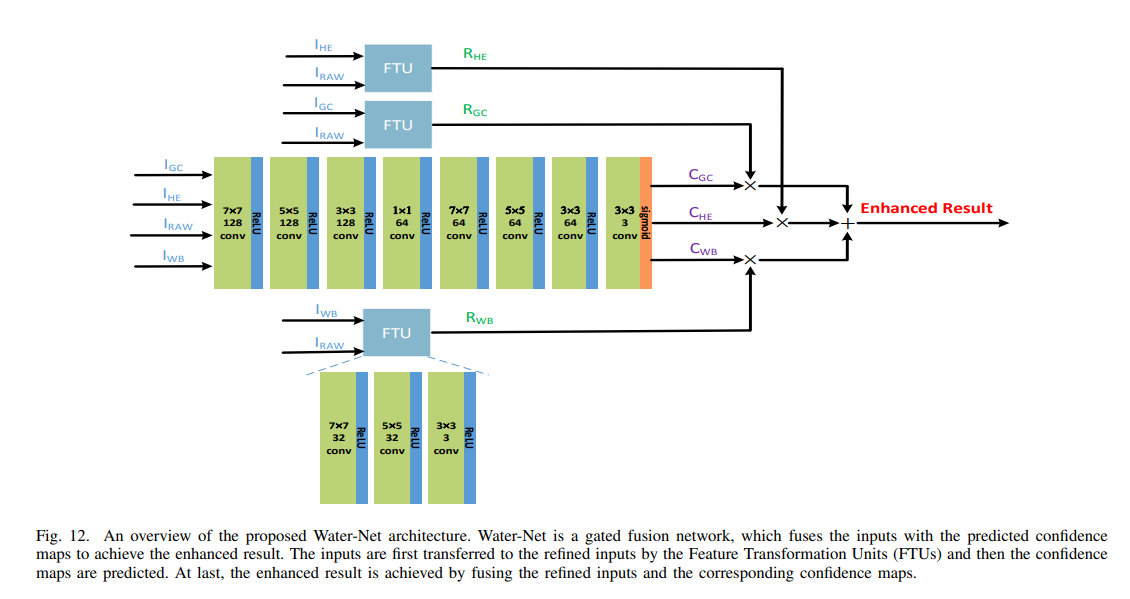

In [1]:
import torch
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Make sure you are connected to a GPU instance
torch.cuda.is_available()

True

In [3]:
# Load from torchhub
repo = 'tnwei/waternet:main'
model = 'waternet'
preprocess, postprocess, model = torch.hub.load(repo, model)
model.eval();

Using cache found in C:\Users\tiago/.cache\torch\hub\tnwei_waternet_main


In [11]:
import glob
imgs = sorted(glob.glob("C:/COLMAP-3.8-windows-cuda/data_recifes/Fotogrametria AReef/test/*"))

In [8]:
from glob import glob

data_dir = "C:/COLMAP-3.8-windows-cuda/data_reefs"

imgs_c5_07 = sorted(glob(data_dir + "/C5_reef/2019_07_water/*")) 
imgs_c5_08 = sorted(glob(data_dir + "/C5_reef/2019_08_water/*"))
imgs_c5_10 = sorted(glob(data_dir + "/C5_reef/2022_10_water/*"))
                    
imgs_c6_07 = sorted(glob(data_dir + "/C6_reef/2019_07_water/*"))
imgs_c6_08 = sorted(glob(data_dir + "/C6_reef/2019_08_water/*"))
imgs_c6_10 = sorted(glob(data_dir + "/C6_reef/2022_10_water/*"))
                    
list_imgs_c5 = [imgs_c5_07, imgs_c5_08, imgs_c5_10]
list_imgs_c6 = [imgs_c6_07, imgs_c6_08, imgs_c6_10]

In [10]:
import os
DIR = "C:\\reefs_data"
IMGS_DIR = os.path.join(DIR, 'data_reefs_800_600')
IMGS_DIR

'C:\\reefs_data\\data_reefs_800_600'

## Processing all dataset images 
input resolution: 900x600

output resolution: 800x600

In [13]:
import numpy as np
i = 0
for list in list_imgs_c5:
    folder = os.path.dirname(list[0])
    basename = os.path.basename(folder)
    new_folder = os.path.join(IMGS_DIR, "C5", basename + "_waternet")
    os.makedirs(new_folder, exist_ok=True)
    for img in list:
        im = cv2.imread(img)
        #im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        # Waternet only acepts image size with W/H = 1.5 ratio
        im = cv2.resize(im, (900, 600), interpolation=cv2.INTER_LANCZOS4) 
        #im = cv2.resize(im, (720, 480), interpolation=cv2.INTER_CUBIC) 
        # Inference -> return numpy array (1, 3, H, W)
        rgb_ten, wb_ten, he_ten, gc_ten = preprocess(im)
        out_ten = model(rgb_ten, wb_ten, he_ten, gc_ten)
        out_im = postprocess(out_ten)
        resized_img = cv2.resize(np.squeeze(out_im), (800, 600), 
                            interpolation=cv2.INTER_LANCZOS4)
        filename = os.path.splitext(os.path.basename(img))[0]+".png"
        cv2.imwrite(os.path.join(new_folder, filename), resized_img)
        print (f"Processed image: {os.path.basename(rgb_im)}, #{i+1} out of #{len(list)}")
        i = i+1

In [15]:
i = 0
for list in list_imgs_c6:
    folder = os.path.dirname(list[0])
    basename = os.path.basename(folder)
    new_folder = os.path.join(IMGS_DIR, "C6", basename + "_waternet")
    os.makedirs(new_folder, exist_ok=True)
    for img in list:
        im = cv2.imread(img)
        #im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        # Waternet only acepts image size with W/H = 1.5 ratio
        im = cv2.resize(im, (900, 600), interpolation=cv2.INTER_LANCZOS4) 
        #im = cv2.resize(im, (720, 480), interpolation=cv2.INTER_CUBIC) 
        # Inference -> return numpy array (1, 3, H, W)
        rgb_ten, wb_ten, he_ten, gc_ten = preprocess(im)
        out_ten = model(rgb_ten, wb_ten, he_ten, gc_ten)
        out_im = postprocess(out_ten)
        resized_img = cv2.resize(np.squeeze(out_im), (800, 600), 
                            interpolation=cv2.INTER_LANCZOS4)
        filename = os.path.splitext(os.path.basename(img))[0]+".png"
        cv2.imwrite(os.path.join(new_folder, filename), resized_img)
        print (f"Processed image: {os.path.basename(img)}, #{i+1} out of #{len(list)}")
        i = i+1

Processed image: G1665836.JPG, #1 out of #1182
Processed image: G1665837.JPG, #2 out of #1182
Processed image: G1665838.JPG, #3 out of #1182
Processed image: G1665839.JPG, #4 out of #1182
Processed image: G1665840.JPG, #5 out of #1182
Processed image: G1665841.JPG, #6 out of #1182
Processed image: G1665842.JPG, #7 out of #1182
Processed image: G1665843.JPG, #8 out of #1182
Processed image: G1665844.JPG, #9 out of #1182
Processed image: G1665845.JPG, #10 out of #1182
Processed image: G1675846.JPG, #11 out of #1182
Processed image: G1675847.JPG, #12 out of #1182
Processed image: G1675848.JPG, #13 out of #1182
Processed image: G1675849.JPG, #14 out of #1182
Processed image: G1675850.JPG, #15 out of #1182
Processed image: G1675851.JPG, #16 out of #1182
Processed image: G1675852.JPG, #17 out of #1182
Processed image: G1675853.JPG, #18 out of #1182
Processed image: G1675854.JPG, #19 out of #1182
Processed image: G1675855.JPG, #20 out of #1182
Processed image: G1685856.JPG, #21 out of #1182
P

In [45]:
%%time
import os
for rgb_im in imgs:
  im = cv2.imread(rgb_im)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  im = cv2.resize(im, (800, 600))
  # Inference -> return numpy array (1, 3, H, W)
  rgb_ten, wb_ten, he_ten, gc_ten = preprocess(im)
  out_ten = model(rgb_ten, wb_ten, he_ten, gc_ten)
  out_im = postprocess(out_ten)
  cv2.imwrite("output_waternet/"+"out_"+ os.path.basename(rgb_im), cv2.cvtColor(out_im[0], cv2.COLOR_RGB2BGR))    

CPU times: total: 9min 57s
Wall time: 1min 23s


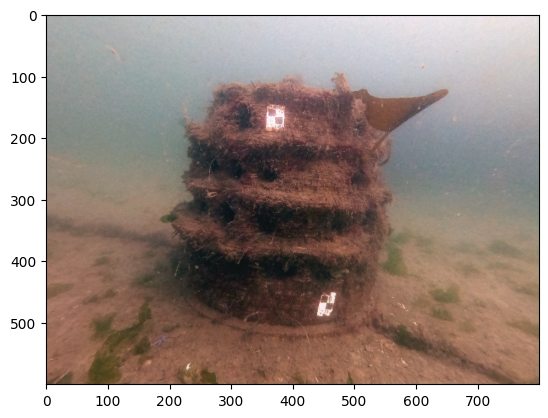

In [24]:
plt.imshow(out_im[0])

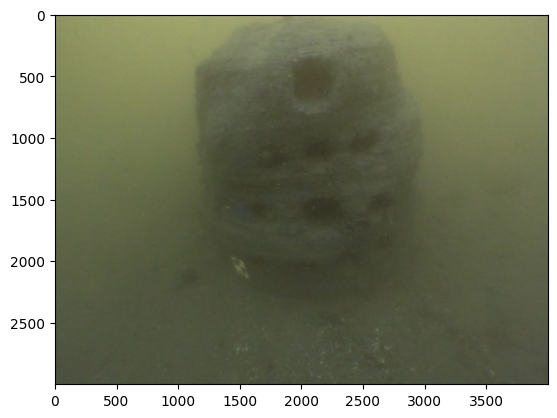

In [44]:
im = cv2.imread(imgs[0])
#im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

plt.imshow(im)

## Results Visualizationimgs_out = sorted(glob.glob("/content/output_WaterNet/*"))

In [46]:
imgs_out = sorted(glob.glob("output_waternet/*"))

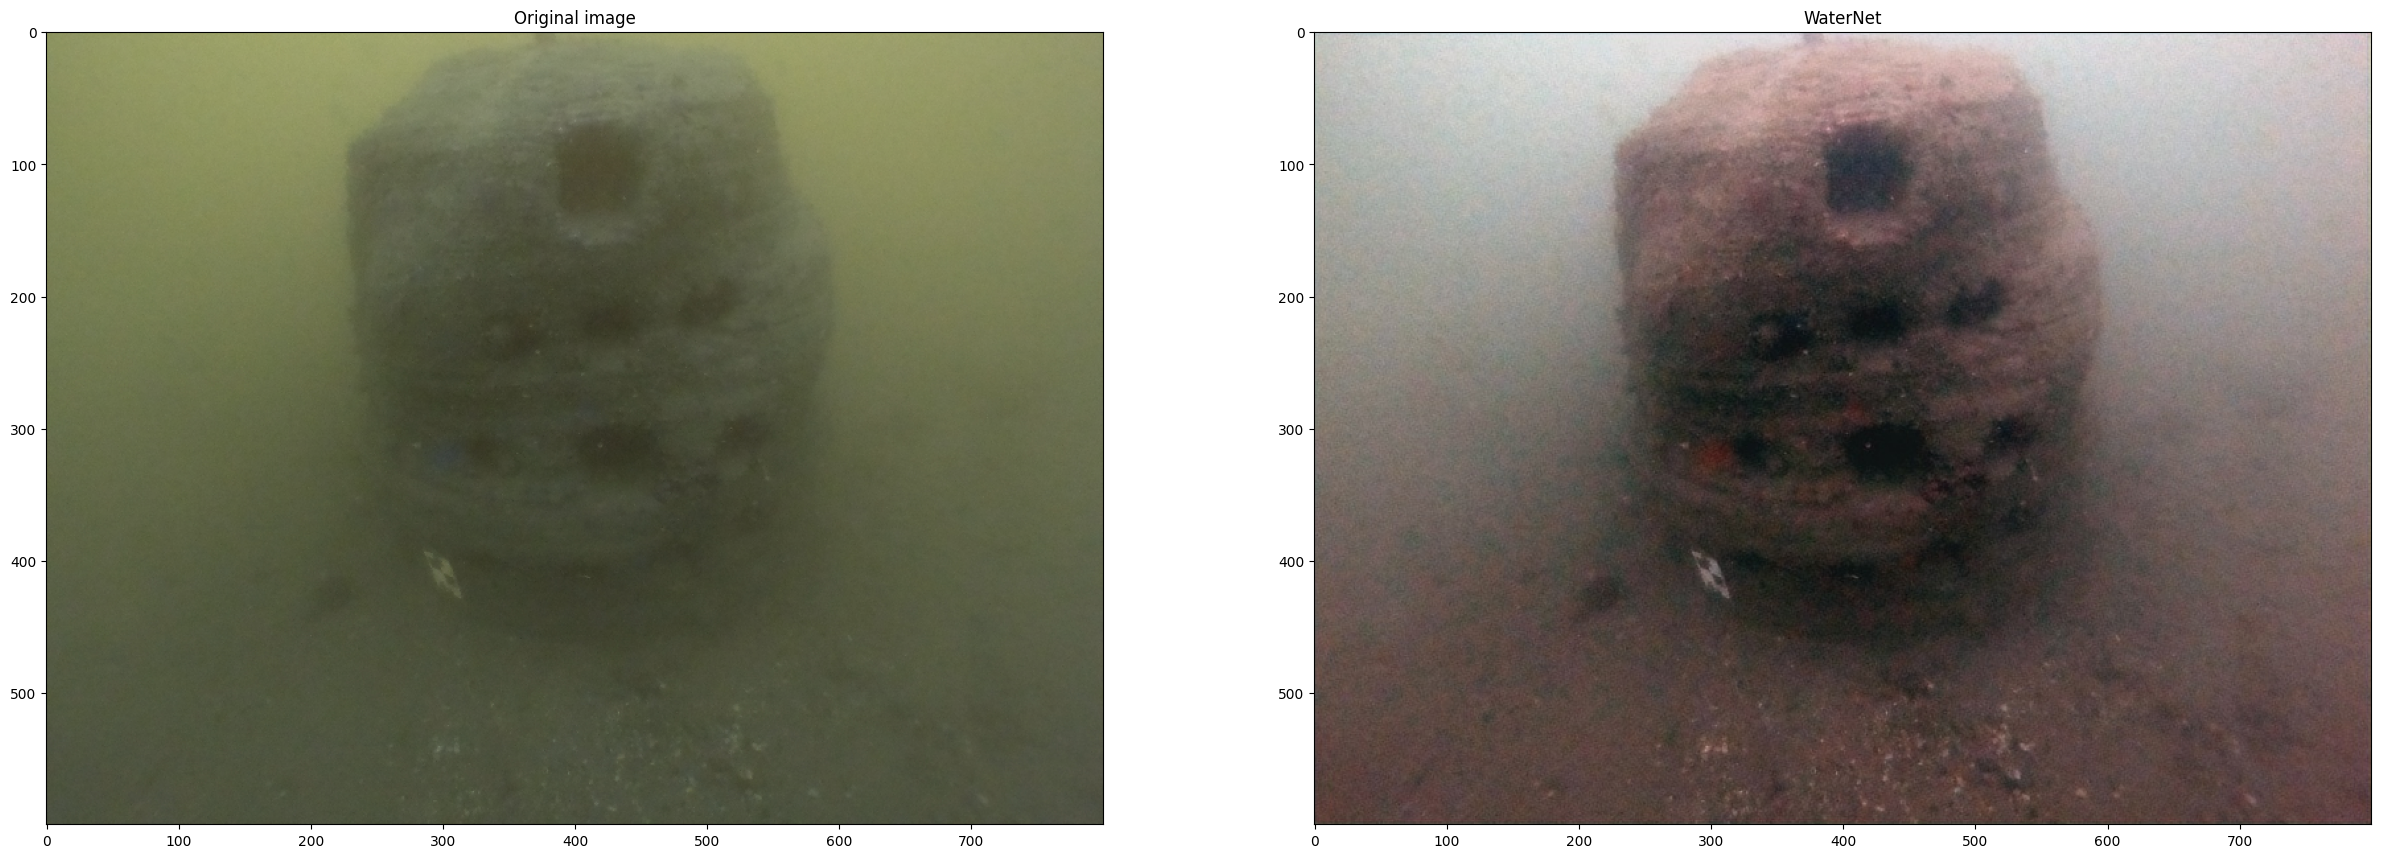

In [47]:
fig, ax = plt.subplots(ncols=2, figsize=(30, 30))
im = cv2.imread(imgs[0])
im = cv2.resize(im, (800, 600))

ax[0].imshow(im)
ax[0].set_title("Original image")

out_img = cv2.imread(imgs_out[0])
out_img = cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB)
ax[1].imshow(out_img)
ax[1].set_title("WaterNet")

plt.show()

### Edges Visualization

In [27]:
edg_out = cv2.Canny(out_img,100,200)
edg_in = cv2.Canny(im,100,200)

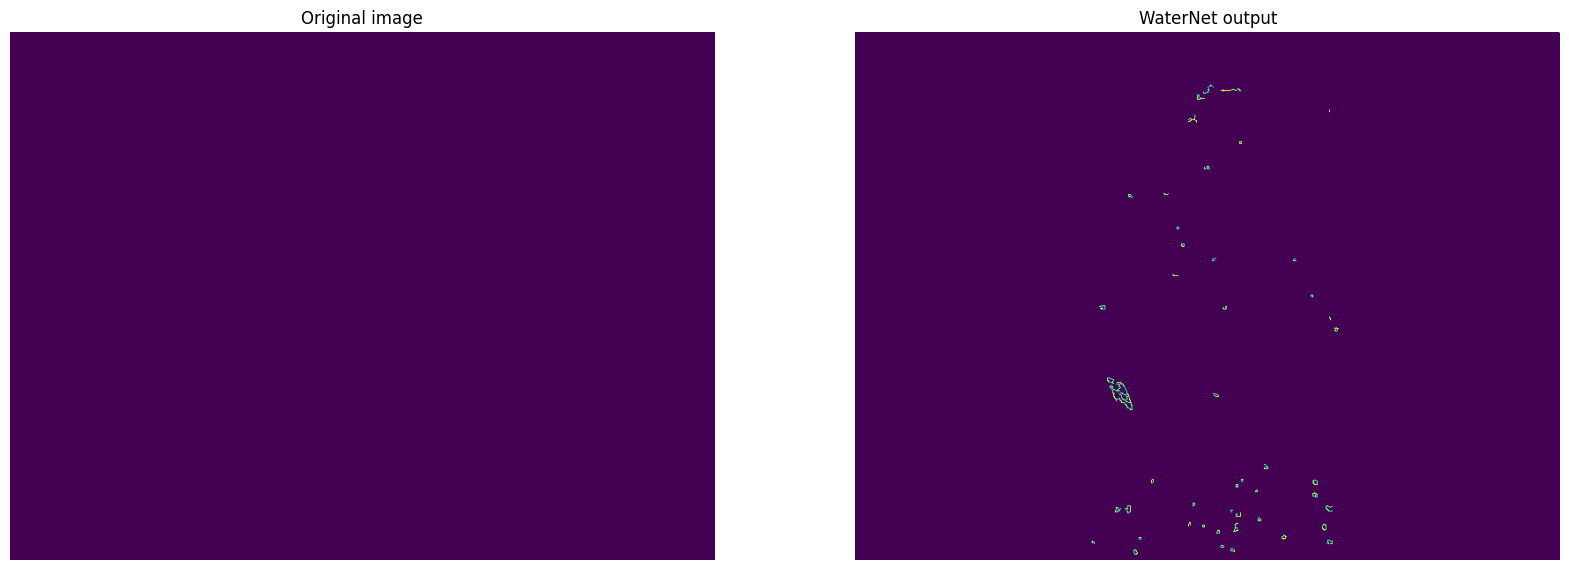

In [28]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax[0].imshow(edg_in)
ax[0].axis("off")
ax[0].set_title("Original image")

ax[1].imshow(edg_out)
ax[1].axis("off")
ax[1].set_title("WaterNet output")

plt.show()

## Evalution Metrics Functions

In [31]:
# source: https://github.com/Riccellisp/ProjetoPecem/blob/ba8c5e7b991e93044e3c86c42e48d3df4c9595fb/metrics.py

from skimage.metrics import structural_similarity as ssim
from skimage import color,filters
import numpy as np
import math
import sys

def plipsum(i,j,gamma=1026):
    return i + j - i * j / gamma

def plipsub(i,j,k=1026):
    return k * (i - j) / (k - j)

def plipmult(c,j,gamma=1026):
    return gamma - gamma * (1 - j / gamma)**c

def logamee(ch,blocksize=8):

    num_x = math.ceil(ch.shape[0] / blocksize)
    num_y = math.ceil(ch.shape[1] / blocksize)
    
    s = 0
    w = 1. / (num_x * num_y)
    for i in range(num_x):

        xlb = i * blocksize
        if i < num_x - 1:
            xrb = (i+1) * blocksize
        else:
            xrb = ch.shape[0]

        for j in range(num_y):

            ylb = j * blocksize
            if j < num_y - 1:
                yrb = (j+1) * blocksize
            else:
                yrb = ch.shape[1]
            
            block = ch[xlb:xrb,ylb:yrb]
            blockmin = float(np.min(block))
            blockmax = float(np.max(block))

            top = plipsub(blockmax,blockmin)
            bottom = plipsum(blockmax,blockmin)

            # if bottom == 0, result == 0
            m = bottom and top / bottom or 0
            if m ==0.:
                s+=0
            else:
                s += (m) * np.log(m)

    return plipmult(w,s)

def eme(img,rowSample,columnSample):
	
	grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	
	rowSize, columnSize = grayImg.shape
	nRows = int(rowSize/rowSample)
	nColumns = int(columnSize/columnSample)
	incompleteRow = math.ceil(rowSize/rowSample) - nRows
	incompleteColumn = math.ceil(columnSize/columnSample) - nColumns

	somatory = 0
	nBlocks = nRows*nColumns
	for i in range(0,nRows):
		for j in range(0,nColumns):
			imax=grayImg[i*rowSample:(i+1)*rowSample,j*columnSample:(j+1)*rowSample].max()
			imin=grayImg[i*rowSample:(i+1)*rowSample,j*columnSample:(j+1)*rowSample].min()
			if imin==0:
				imin=1
			if imax==0:
				imax=1
			somatory = somatory + 20*math.log(imax/imin)

	if incompleteColumn==1:
		for i in range(0,nRows):
			imax=grayImg[i*rowSample:(i+1)*rowSample,nColumns*columnSample:columnSize].max()
			imin=grayImg[i*rowSample:(i+1)*rowSample,nColumns*columnSample:columnSize].min()
			if imin==0:
				imin=1
			if imax==0:
				imax=1
			somatory = somatory + 20*math.log(imax/imin)
			nBlocks = nBlocks + 1
	if incompleteRow==1:
		for j in range(0,nColumns):
			imax=grayImg[grayImg[nRows*rowSample:rowSize,j*columnSample:(j+1)*columnSample]].max()
			imin=grayImg[grayImg[nRows*rowSample:rowSize,j*columnSample:(j+1)*columnSample]].min()
			if imin==0:
				imin=1
			if imax==0:
				imax=1
			somatory = somatory + 20*math.log(imax/imin)
			nBlocks = nBlocks + 1
	if incompleteRow==1 and incompleteColumn==1:
		imax=grayImg[nRows*rowSample:rowSize,nColumns*columnSample:columnSize].max()
		imin=grayImg[nRows*rowSample:rowSize,nColumns*columnSample:columnSize].max()
		if imin==0:
			imin=1
		if imax==0:
			imax=1
		somatory = somatory + 20*math.log(imax/imin)
		nBlocks = nBlocks + 1
	return somatory/nBlocks

def UCIQE(a,c1=0.4680,c2 = 0.2745,c3 = 0.2576):
    """
    Underwater colour image quality evaluation metric (UCIQE) é uma métrica baseada na combinação
    linear de croma (pureza), saturação e contraste principalmente de imagens subaquáticas, mas também
    baseadaem trabalhos atuais de avaliação de imagens coloridas atmosféricas. 
    REF: M. Yang and A. Sowmya, "An Underwater Color Image Quality Evaluation Metric," in IEEE Transactions on Image Processing, 
    vol. 24, no. 12, pp. 6062-6071, Dec. 2015, doi: 10.1109/TIP.2015.2491020.
    :param a: imagem de entrada
    :c1,c2,c3: coeficentes ponderados
    :return c1 * sc + c2 * conl + c3 * us
    """
    rgb = a
    lab = color.rgb2lab(a)
    l = lab[:,:,0]

    #1st term
    chroma = (lab[:,:,1]**2 + lab[:,:,2]**2)**0.5
    uc = np.mean(chroma)
    sc = (np.mean((chroma - uc)**2))**0.5

    #2nd term
    top = int(np.round(0.01*l.shape[0]*l.shape[1]))
    sl = np.sort(l,axis=None)
    isl = sl[::-1]
    conl = np.mean(isl[:top])-np.mean(sl[:top])

    #3rd term
    satur = []
    chroma1 = chroma.flatten()
    l1 = l.flatten()
    for i in range(len(l1)):
      if chroma1[i] == 0: satur.append(0)
      elif l1[i] == 0: satur.append(0)
      else: satur.append(chroma1[i] / l1[i])

    us = np.mean(satur)

    return  c1 * sc + c2 * conl + c3 * us

def UIQM(a,p1=0.0282,p2=0.2953,p3=3.5753):
    """
    REF: K. Panetta, C. Gao and S. Agaian, Human-Visual-System-Inspired Underwater Image Quality Measures, 
    in IEEE Journal of Oceanic Engineering, vol. 41, no. 3, pp. 541-551, July 2016, doi: 10.1109/JOE.2015.2469915.
    Metrica sem referencia, semelhante a UCIQE, mas mais atual. Leva em consideração a medida de colorção,
    medida de nitidez e medida de contraste.
    """
    #1st term UICM
    #TαL=⌈αLK⌉ - > o inteiro mais próximo maior ou igual a αLK
    #TαR=⌊αRK⌋ - > o inteiro mais próximo menor ou igual a αRK
    rgb=a
    gray = color.rgb2gray(a)
    rg = rgb[:,:,0] - rgb[:,:,1]
    yb = (rgb[:,:,0] + rgb[:,:,1]) / 2 - rgb[:,:,2]
    rgl = np.sort(rg,axis=None)
    ybl = np.sort(yb,axis=None)
    al1 = 0.1
    al2 = 0.1
    T1 = int(al1 * len(rgl))
    T2 = int(al2 * len(rgl))
    rgl_tr = rgl[T1:-T2]
    ybl_tr = ybl[T1:-T2]

    urg = np.mean(rgl_tr) # μ^2_α,RG
    s2rg = np.mean((rgl_tr - urg) ** 2)  # σ2α,RG
    uyb = np.mean(ybl_tr) # μ^2_α,YB
    s2yb = np.mean((ybl_tr- uyb) ** 2) # σ2α,YB

    uicm =-0.0268 * np.sqrt(urg**2 + uyb**2) + 0.1586 * np.sqrt(s2rg + s2yb)

    #2nd term UISM (k1k2=8x8)   # medida de nitidez de imagem
    """Para medir a nitidez nas bordas, o detector de bordas Sobel é aplicado primeiro em cada componente de cor RGB
      O mapa de arestas resultante é então multiplicado pela imagem original para obter o mapa de arestas em tons de cinza."""
    # Rsobel = rgb[:,:,0] * filters.sobel(rgb[:,:,0]) 
    # Gsobel = rgb[:,:,1] * filters.sobel(rgb[:,:,1])
    # Bsobel = rgb[:,:,2] * filters.sobel(rgb[:,:,2])

    # Rsobel=np.round(Rsobel).astype(np.uint8)  # Arredonda a matriz para numeros inteiros
    # Gsobel=np.round(Gsobel).astype(np.uint8)
    # Bsobel=np.round(Bsobel).astype(np.uint8)

    Reme = eme(a,8,8)
    Geme = eme(a,8,8)
    Beme = eme(a,8,8)
    uism = 0.299 * Reme + 0.587 * Geme + 0.114 * Beme

    #3rd term UIConM
    uiconm = logamee(gray)
    uiqm = p1 * uicm + p2 * uism + p3 * uiconm

    return uiqm	

def CCF(imageRGB):
	"""REF:
	@article{WANG2018904,
	title = {An imaging-inspired no-reference underwater color image quality assessment metric},
	journal = {Computers & Electrical Engineering},
	volume = {70},
	pages = {904-913},
	year = {2018},
	issn = {0045-7906},
	doi = {https://doi.org/10.1016/j.compeleceng.2017.12.006},
	url = {https://www.sciencedirect.com/science/article/pii/S0045790617324953},
	author = {Yan Wang and Na Li and Zongying Li and Zhaorui Gu and Haiyong Zheng and Bing Zheng and Mengnan Sun},
	keywords = {No-reference image quality assessment, Underwater imaging, Underwater image, Underwater color image quality},
	abstract = {Underwater color image quality assessment (IQA) plays an important role in analysis and applications of underwater imaging as well as image processing algorithms. This paper presents a new metric inspired by the imaging analysis on underwater absorption and scattering characteristics, dubbed the CCF. This metric is feature-weighted with a combination of colorfulness index, contrast index and fog density index, which can quantify the color loss caused by absorption, the blurring caused by forward scattering and the foggy caused by backward scattering, respectively. Then multiple linear regression is used to calculate three weighted coefficients. A new underwater image database is built to illustrate the performance of the proposed metric. Experimental results show a strong correlation between the proposed metric and mean opinion score (MOS). The proposed CCF metric outperforms many of the leading atmospheric IQA metrics, and it can effectively assess the performance of underwater image enhancement and image restoration methods.}
	}
	
	Métrica sem referência. Essa métrica é ponderada por recursos com uma combinação de índice de colorido, 
	índice de contraste e índice de densidade de neblina, que pode quantificar a perda de cor 
	causada pela absorção, o desfoque causado pela dispersão para frente e o nevoeiro causado 
	pela dispersão para trás, respectivamente.
	"""
  # Rij=np.log(rgb[:,:,0])-np.mean(rgb[:,:,0], out=np.zeros_like(rgb[:,:,0])-np.mean(rgb[:,:,0]), where=(rgb[:,:,0])-np.mean(rgb[:,:,0]!=0))
	# Gij=np.log(rgb[:,:,1])-np.mean(rgb[:,:,1], out=np.zeros_like(rgb[:,:,1])-np.mean(rgb[:,:,1]), where=(rgb[:,:,1])-np.mean(rgb[:,:,1]!=0))	
	# Bij=np.log(rgb[:,:,2])-np.mean(rgb[:,:,2], out=np.zeros_like(rgb[:,:,2])-np.mean(rgb[:,:,2]), where=(rgb[:,:,2])-np.mean(rgb[:,:,2]!=0))
	rgb=imageRGB
	gray = color.rgb2gray(imageRGB)
	# Passo 1
	Rij=np.log(rgb[:,:,0])-np.mean(rgb[:,:,0])
	Gij=np.log(rgb[:,:,1])-np.mean(rgb[:,:,1])	
	Bij=np.log(rgb[:,:,2])-np.mean(rgb[:,:,2])

	# Passo 2
	a = rgb[:,:,0] - rgb[:,:,1]
	b = (rgb[:,:,0] + rgb[:,:,1]) / 2 - rgb[:,:,2]
	
	var_a  = np.var(a)
	var_b  = np.var(b)
	mean_a = np.mean(a)
	mean_b = np.mean(b)

	ccf=(math.sqrt(var_a+var_b)+0.3*math.sqrt(var_a+var_b)) /85.59
	

	return ccf

In [32]:
UIQM_list, UCIQE_list, CCF_list  = list(), list(), list()
UIQM_out_list, UCIQE_out_list, CCF_out_list  = list(), list(), list()
for img in imgs:
  im = cv2.imread(img)
  im = cv2.resize(im, (800, 600))
  UIQM_list.append(UIQM(im))
  UCIQE_list.append(UCIQE(im))
  CCF_list.append(CCF(im))

for img in imgs_out:
  im = cv2.imread(img)
  im = cv2.resize(im, (800, 600))
  UIQM_out_list.append(UIQM(im))
  UCIQE_out_list.append(UCIQE(im))
  CCF_out_list.append(CCF(im))

C:\Users\tiago\AppData\Local\Temp\ipykernel_22432\834576404.py:230: RuntimeWarning: divide by zero encountered in log
  Bij=np.log(rgb[:,:,2])-np.mean(rgb[:,:,2])
C:\Users\tiago\AppData\Local\Temp\ipykernel_22432\834576404.py:228: RuntimeWarning: divide by zero encountered in log
  Rij=np.log(rgb[:,:,0])-np.mean(rgb[:,:,0])
C:\Users\tiago\AppData\Local\Temp\ipykernel_22432\834576404.py:229: RuntimeWarning: divide by zero encountered in log
  Gij=np.log(rgb[:,:,1])-np.mean(rgb[:,:,1])


In [33]:
np.mean(UIQM_list), np.std(UIQM_list)

(0.7511057155945053, 0.6609179261897871)

In [34]:
np.mean(UCIQE_list), np.std(UCIQE_list)

(18.056804946491035, 3.3883908529062317)

In [35]:
np.mean(CCF_list), np.std(CCF_list)

(1.1041827219337752, 0.5398153030639654)

In [36]:
np.mean(UIQM_out_list), np.std(UIQM_out_list)

(2.1273902232036543, 0.6753467932914553)

In [37]:
np.mean(UCIQE_out_list), np.std(UCIQE_out_list)

(25.315790014199887, 0.9378095163511782)

In [38]:
np.mean(CCF_out_list), np.std(CCF_out_list)

(1.6254225142590377, 0.2474612778509054)